# Well-log based reservoir property estimation with machine learning

* __Author__: _Jaehyuk Lee_
* __Date__: February 14, 2022

  Note: Chapter "1. Introduction" is written by PDDA in original template.

- <a>1. Introduction </a>
    - <a>1.1. Background</a>
    - <a>1.2. Problem Statement</a>
    - <a>1.3. Data Description</a>
    - <a>1.4. Evaluation Metric</a>
- <a>2. Load Packages</a>
- <a>3. Data Handling</a>
    - <a>3.1 Load Data</a>
    - <a>3.2 Check the data</a>
    - <a>3.3 Analyzing Missing Data</a>
- <a>4. Exploratory Data Analysis</a>
    - <a>4.1 Check Correlation between Features </a>
- <a>4.2 Data Exploration for Each Column</a>
    - <a>4.3 Removing Outlier</a>
    - <a>4.4 Filtering NaN based on Target Columns</a>
    - <a>4.5 Identifying the Features and Targets</a>
- <a>5. Build Machine Models</a>
    - <a>5.1 Splitting the Data Set Into Training and Testing Data Sets</a>
    - <a>5.2 Best parameter selected</a>
- <a>6. Prediction</a>

<a></a>

## Abstract

Well-log data play a key role in estimating reservoir properties, including volumes of minerals, porosity, and water saturation that are critical for reserve estimation. A conventional workflow using a multimineral physical model based on core-log integration requires an a priori rock-fluid model; therefore, it is often inadequate in reservoirs of complex minerals such as carbonate or unconventional fields. There is a potential for applying machine learning (ML) for data-driven solutions. In this tutorial, we demonstrated a machine-learning approach to predict reservoir properties based on conventional well logs. This tutorial aims to provide a starting point for the participants of the 2021 Machine Learning Contest organized by the Society of
Petrophysicists and Well Log Analysts (SPWLA) Petrophysical Data-Driven Analytics Special Interest Group (PDDA-SIG). It applied the Random Forest (RF) regression method to simultaneously predict shale volume, porosity, and water saturation based on conventional well logs (gamma ray, bulk density, neutron porosity, resistivity, and sonic). The RF algorithm was tested with a data set from the Equinor Volve Field. A total of 35,046 data points collected from eight wells were used to train and validate the model. The trained model was then applied on the hidden testing data set from four wells in the same field and achieved reasonable accuracy. The solutions from different participants will be ranked based on the averaged root-mean-squared-error (RMSE) score measured on the blind-testing data set.

## <a>1. Introduction</a>

### <a>1.1. Background</a>
Well logs are interpreted and processed to estimate in-situ reservoir properties (including petrophysical, geomechanical, and geochemical properties), which is essential for reservoir modeling, reserve estimation, and production forecasting. The modeling is often based on multimineral physics or empirical formulae. When sufficient training data are available, a machine-learning solution provides an alternative approach to estimate those reservoir properties based on well-log data and usually has less turnaround time and human involvement.

### <a>1.2. Problem Statement</a>
The objective of this contest is to develop data-driven models to estimate reservoir properties, including shale volume, porosity, and fluid saturation, based on a common set of well logs, including gamma ray, bulk density, neutron porosity, resistivity, and sonic. The participants will be provided with log data from eight wells from the same field together with the corresponding reservoir properties estimated by petrophysicists. They need to build a data-driven model using the provided training data set. Following that, they will deploy the newly developed data-driven models on the test data set to predict the reservoir properties based on
the well-log data.

You will be provided with log data from about 10 wells from the same field together with the corresponding reservoir properties estimated by petrophysicists. You need to build a data-driven model using the provided training dataset. Following that, you will deploy the newly developed data-driven models on the test dataset to predict the reservoir properties based on the well log data. 

### <a>1.3. Data Description</a>
#### Files
&gt; #### train.csv
(All the values equals to -9999 are marked as missing values.)
- WELLNUM - Well number
- DEPTH - Depth, unit in feet
- DTC - Compressional Travel-time, unit in nanosecond per foot
- DTS - Shear Travel-time, unit in microseconds per foot
- BS - Bit size, unit in inch
- CAL - Caliper, unit in Inc
- DEN - Density, unit in Gram per cubic centimeter 
- DENC - Corrected density, unit in Gram per cubic centimeter 
- GR - Gamma Ray, unit in API
- NEU - Neutron, unit in dec
- PEF - Photo-electric Factor, unit in barns/e
- RDEP - Deep Resistivity, unit in Ohm.m
- RMED - Medium Resistivity, unit in Ohm.m
- ROP - Rate of penetration, unit in meters per hour
- PHIF - Porosity, a unit equals to the percentage of pore space in a unit volume of rock.
- SW - Water saturation
- VSH - Shale Volume

&gt; #### test.csv
The test data has all features that you used in the train dataset, except PHIF, SW, and VSH.

&gt; ####  sample_submission.csv
A valid sample submission.
<p><font style="">
</font></p>

### <a>1.4. Evaluation Metric</a>
Submissions are evaluated according to root mean squared error(RMSE)

$$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(\hat{\mathbf{y_{i}}} - \mathbf{y_{i}})^{2}} = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(\hat{y}_{1, i} - y_{1, i})^{2}+(\hat{y}_{2, i} - y_{2, i})^{2}+(\hat{y}_{3, i} - y_{3, i})^{2}}$$

where
- $\hat{y_i}$ is the predicted values of the true values $y_i$. Both $\hat{y_i}$ and $y_i$ are vectors with 3 elements: $y_{1,i}$ - PHIF, $y_{2,i}$ - SW, and $y_{3,i}$ - VSH. 
- $m$ is sample size.

**Note**:
- Please remember to use random_state for all randomization steps, so the results are reproducible. 
- PHIF, SW, and VSH are in the same weight during the evaluation. 
- Understanding and optimizing your predictions for this evaluation metric is paramount for this competition.

## <a>2. Load Packages </a>
Let's import key libraries for fundamental data processing, data visualization, data science and machine learning packages.

In [1]:
# import libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pkg_resources
pkg_resources.require("seaborn==0.11.2")
import seaborn as sns
#sns.set_theme(style="ticks")

# import sklearn libararies
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

#from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from numpy import mean
from numpy import std
from numpy import absolute

import lightgbm as lgb
import xgboost as xgb
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid")

## <a>3. Data Handling</a>

### <a>3.1 Load Data</a>
 Using below folder structure
  - source     : EDA and modeling codes 
  - data       : train / test dataset
  - submission : submitted results  

In [122]:
df = pd.read_csv('../data/train.csv')

### <a>3.2 Check the data

In [123]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_tmp = df.copy()

# let's glimpse train data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318967 entries, 0 to 318966
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   WELLNUM  318967 non-null  int64  
 1   DEPTH    318967 non-null  float64
 2   DTC      318967 non-null  float64
 3   DTS      318967 non-null  float64
 4   BS       318967 non-null  float64
 5   CALI     318967 non-null  float64
 6   DEN      318967 non-null  float64
 7   DENC     318967 non-null  float64
 8   GR       318967 non-null  float64
 9   NEU      318967 non-null  float64
 10  PEF      318967 non-null  float64
 11  RDEP     318967 non-null  float64
 12  RMED     318967 non-null  float64
 13  ROP      318967 non-null  float64
 14  PHIF     318967 non-null  float64
 15  SW       318967 non-null  float64
 16  VSH      318967 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 41.4 MB


In info() result, there is no null counts in Non-Null Count, however, in data description, "All the values equals to -9999 are marked as missing values." 

In [124]:
df.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
count,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00
mean,4.08,6998.18,-7791.05,-8605.14,-958.27,-6982.04,-7000.76,-7205.37,-43.03,-7007.12,-7221.97,-949.84,-804.02,-989.37,-8515.78,-8515.69,-8585.16
std,2.46,3797.94,4168.06,3491.48,2969.16,4592.48,4582.29,4486.57,990.10,4578.76,4480.14,2944.07,4177.16,3028.43,3554.02,3554.22,3484.04
min,0.00,335.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
25%,2.00,3757.87,-9999.00,-9999.00,8.50,-9999.00,-9999.00,-9999.00,23.33,-9999.00,-9999.00,0.65,0.67,15.20,-9999.00,-9999.00,-9999.00
50%,4.00,6905.18,-9999.00,-9999.00,17.50,-9999.00,-9999.00,-9999.00,55.51,-9999.00,-9999.00,1.10,1.15,24.97,-9999.00,-9999.00,-9999.00
75%,6.00,10052.49,-9999.00,-9999.00,26.00,8.56,2.25,0.03,78.98,0.09,0.06,2.02,2.15,30.63,-9999.00,-9999.00,-9999.00
max,8.00,15651.58,181.81,388.84,36.00,20.33,3.09,0.33,1124.44,1.46,13.84,80266.80,97543.40,208.63,0.40,1.00,3.65


All measured data has null values (min = -999.00) and many columns include null values including significantly because null values (-9999) are 25%, 50% and 75%. 

All missing values are replaced to NaN.

In [125]:
# replace -9999 to NaN  
df.replace(['-9999.00', -9999,-9999.00], np.nan, inplace=True)

In [126]:
df.sample(10)

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
316443,8,10883.00,64.80,NaN,8.50,8.51,2.54,0.03,13.65,0.12,5.79,3.97,3.68,23.10,0.07,1.00,0.10
156408,4,8760.17,NaN,NaN,12.25,NaN,NaN,NaN,12.63,NaN,NaN,1.59,1.78,15.47,NaN,NaN,NaN
164922,4,11553.48,NaN,NaN,8.50,8.52,2.18,0.03,30.23,0.21,5.17,11.34,12.12,29.85,0.26,0.20,0.21
193590,5,8128.28,NaN,NaN,17.50,NaN,NaN,NaN,79.27,NaN,NaN,0.57,0.65,34.89,NaN,NaN,NaN
63168,1,11608.92,77.20,NaN,8.50,8.62,2.60,0.06,108.12,0.21,6.63,1.97,2.02,24.86,0.03,1.00,0.78
240626,6,11817.91,NaN,NaN,8.50,8.62,2.36,0.05,53.46,0.19,5.19,6.02,7.20,30.00,0.19,0.34,0.40
73226,2,3635.50,NaN,NaN,26.00,NaN,NaN,NaN,65.95,NaN,NaN,1.40,1.46,19.15,NaN,NaN,NaN
8734,0,4702.16,NaN,NaN,NaN,NaN,NaN,NaN,77.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57220,1,9657.48,65.65,NaN,8.50,8.58,2.60,0.05,10.76,0.08,7.72,4.73,4.73,25.05,NaN,NaN,NaN
52364,1,8064.31,NaN,NaN,17.50,NaN,NaN,NaN,82.53,NaN,NaN,0.74,0.74,6.76,NaN,NaN,NaN


### <a>3.3 Analyzing Missing Data </a>

In [127]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent (NaN)'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

<AxesSubplot:>

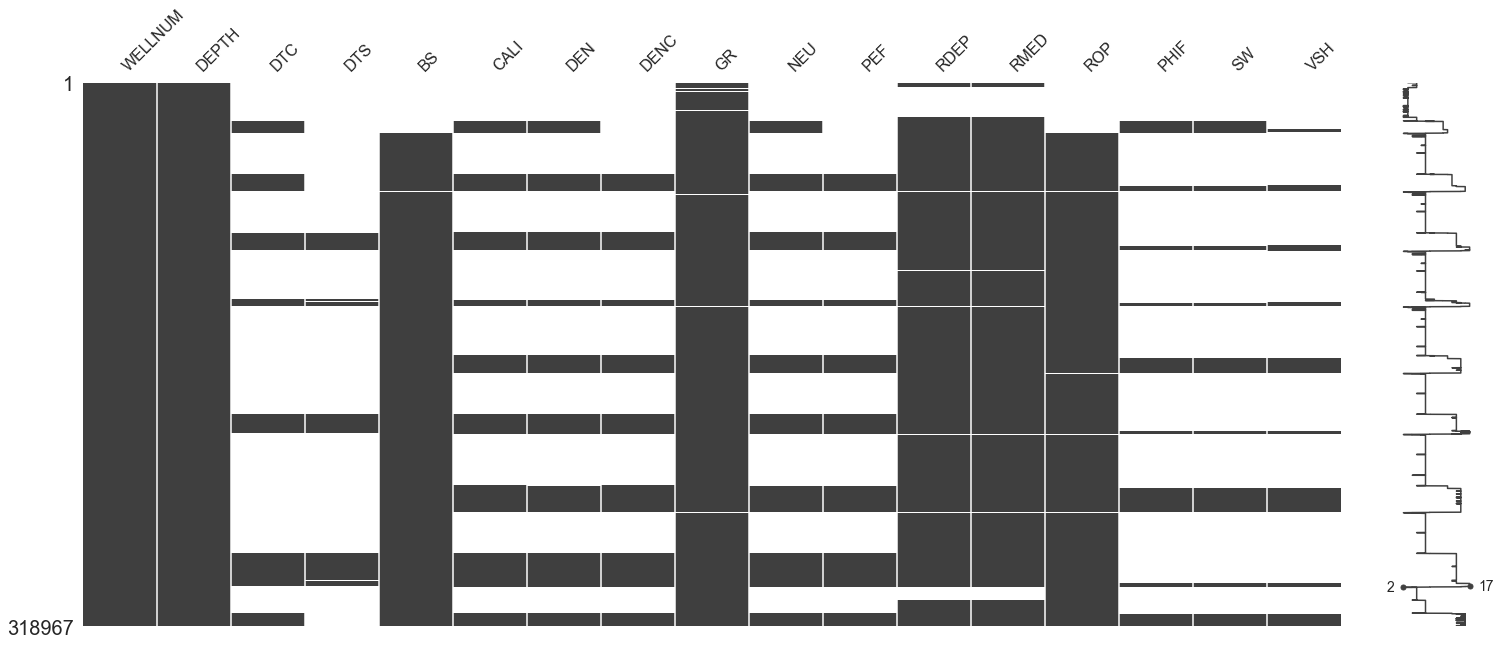

In [128]:
# Visualize missing data in dataset
msno.matrix(df)

###  percentage of missing data in each feature

In [129]:
missing_data(df)

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
Total,0,0,249073,275119,31054,222810,223347,229851,3119,223528,230431,30448,30214,32379,271653,271653,273867
Percent (NaN),0.00,0.00,78.09,86.25,9.74,69.85,70.02,72.06,0.98,70.08,72.24,9.55,9.47,10.15,85.17,85.17,85.86
Types,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


Some columns include NaN more than 3/4 in total data.

## <a>4. Exploratory Data Analysis </a>

This create_plot function takes a number of arguments (inputs):
wellname: the wellname as a string
dataframe: the dataframe for the selected well
curves_to_plot: a list of logging curves / dataframe columns we are wanting to plot
depth_curve: the depth curve we are wanting to plot against
log_curves: a list of curves that need to be displayed on a logarithmic scale

In [130]:
# Create empty lists
dfs_wells = []
wellnames = []

grouped = df.groupby("WELLNUM")

#split up the data by well
for well, data in grouped:
    dfs_wells.append(data)
    wellnames.append(well)


In [131]:
def create_plot(wellname, dataframe, 
                curves_to_plot, depth_curve, 
                log_curves=[]):
    
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        
        
        ax[i].plot(dataframe[curve], depth_curve)
        
        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data 
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
    
    plt.tight_layout()
    plt.show()

In [132]:
curves_to_plot = ['DTC', 'DTS', 'BS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP', 'PHIF', 'SW', 'VSH']

logarithmic_curves = ['RACEHM', 'RACELM', 'RPCEHM', 'RPCELM']

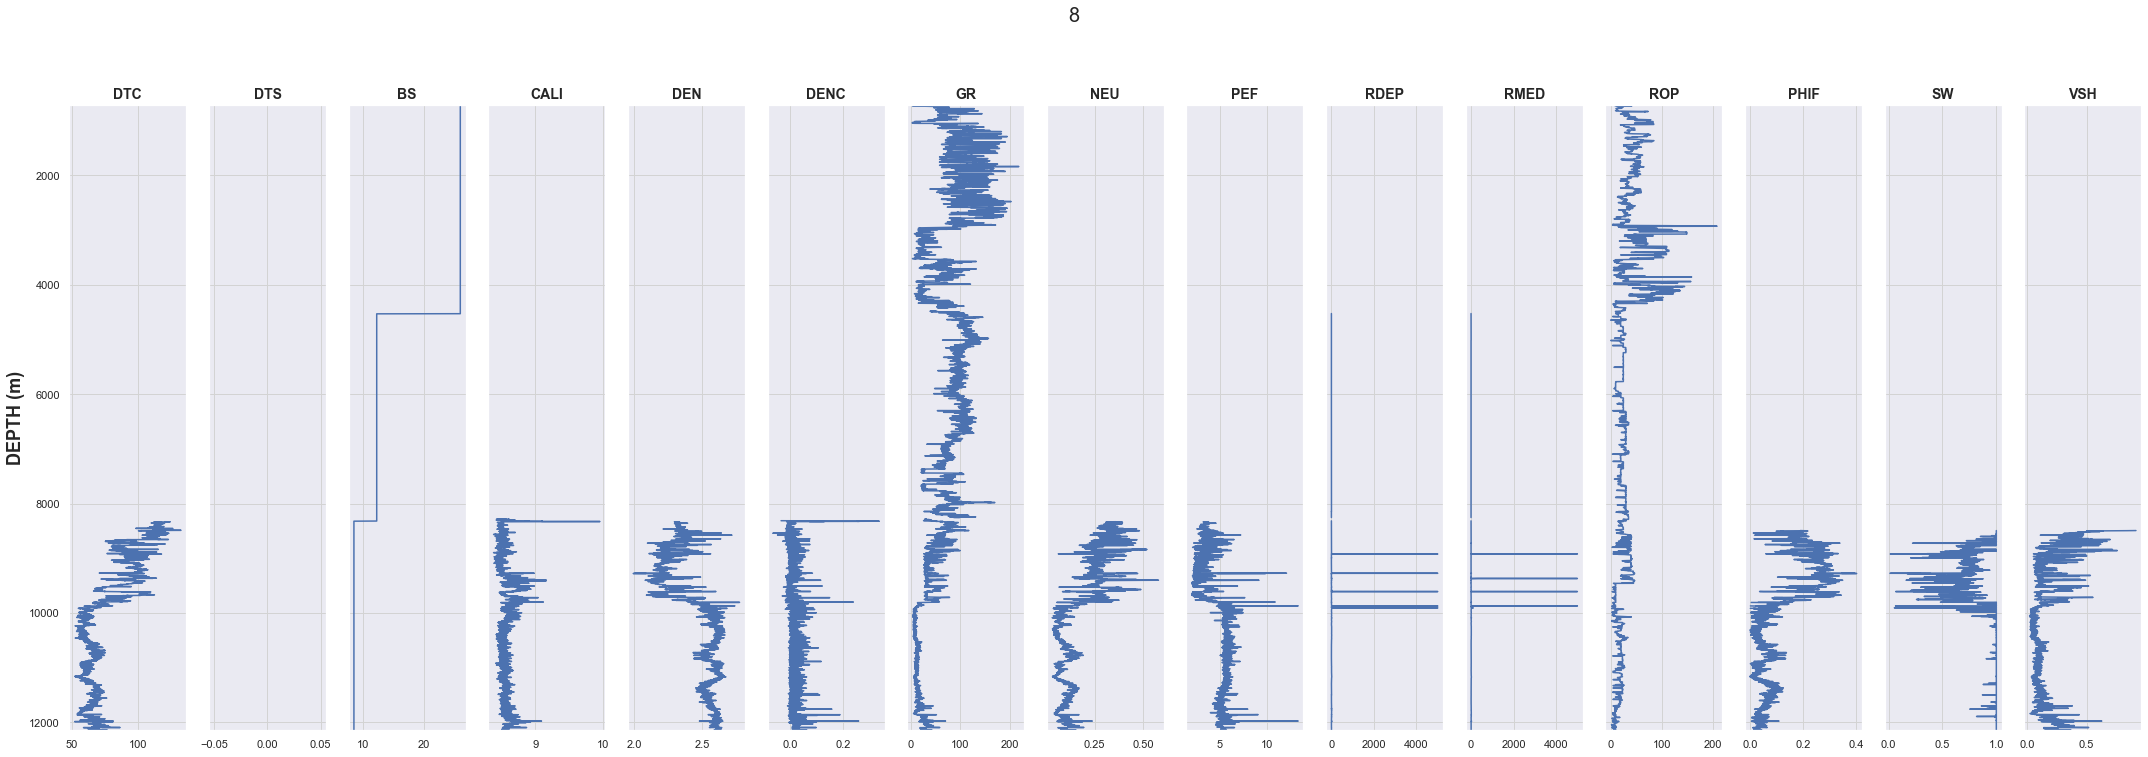

In [133]:
well = 8
create_plot(wellnames[well], dfs_wells[well],
            curves_to_plot, dfs_wells[well]['DEPTH'], 
            logarithmic_curves)

### <a>4.1 Check Correlation between Features </a>

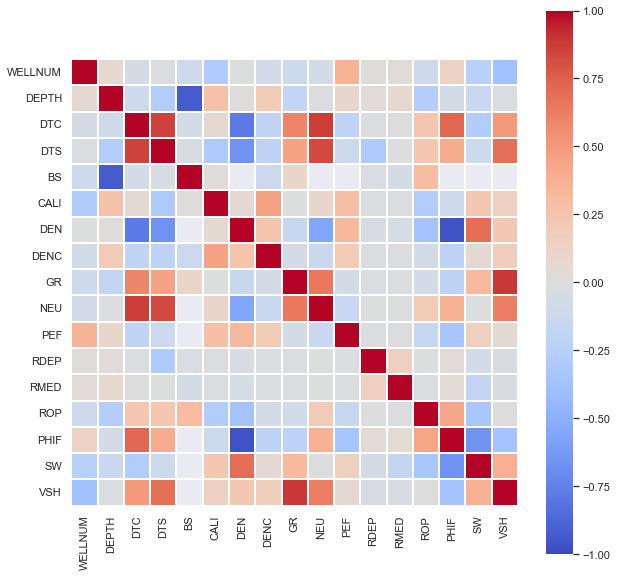

In [134]:
corr = df.corr()

fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.heatmap(corr, square=True, linecolor='white', linewidth=0.1, cmap='coolwarm', annot=False, vmax=1.0, vmin=-1.0)
plt.show()

high correlation features with targets: 
- **GR/VSH: 0.88**
- **DEN/PHIF : -0.96**
- **DEN/SW     : 0.69**

Also, DTC and DTS have high colinearity with NEU. These correlation factors are  0.87 and 0.83 respectively.

 ### <a> 4.2 Data Exploration for Each Column </a>
 Each feature has different distribution and contains outliers which impacts on analyzing data. Let's look through the charactersitics of data. 
 
### Historgram 

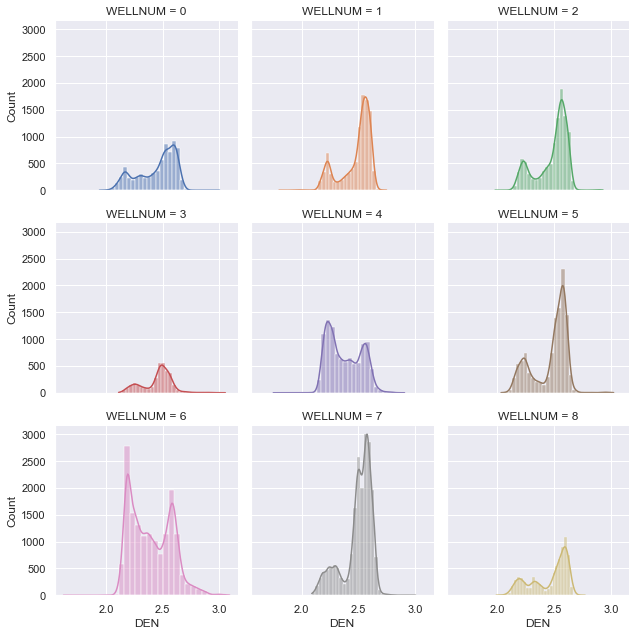

In [135]:
g = sns.FacetGrid(df, col='WELLNUM', hue='WELLNUM', col_wrap=3)
g.map(sns.histplot, 'DEN', kde=True, bins=30)

### Boxplot

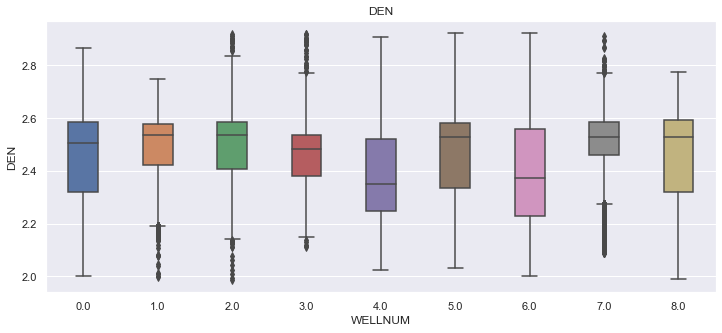

In [149]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
# Boxplot of Gamma Ray Per Well
sns.boxplot(data=df, x='WELLNUM', y='DEN', hue='WELLNUM', dodge =False, width=0.4 )
ax.set_title('DEN')
ax.get_legend().remove()

Each well data has many outliers, then they should be handled properly.

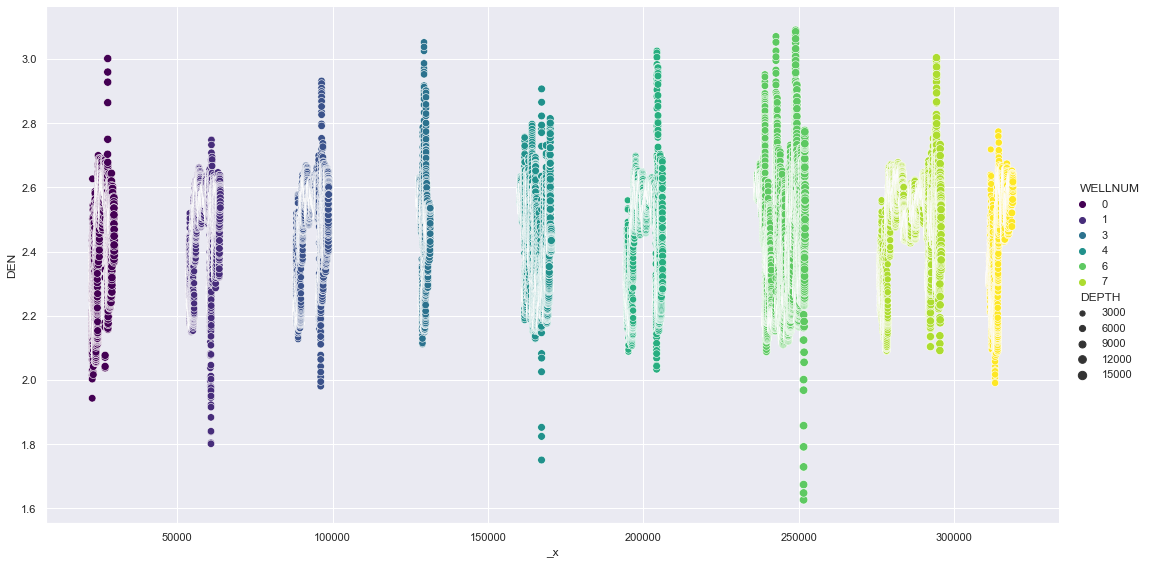

In [137]:
sns.relplot(
    data=df, 
    kind = "scatter",
    x = df.index,
    y = "DEN", 
    hue="WELLNUM",  
    size="DEPTH",
    palette="viridis",
    height=8, aspect=15/8
)


Some features have large portion of null values and valid data within only certain depth ranges.  

#### Let's look at the characteristics of all data together

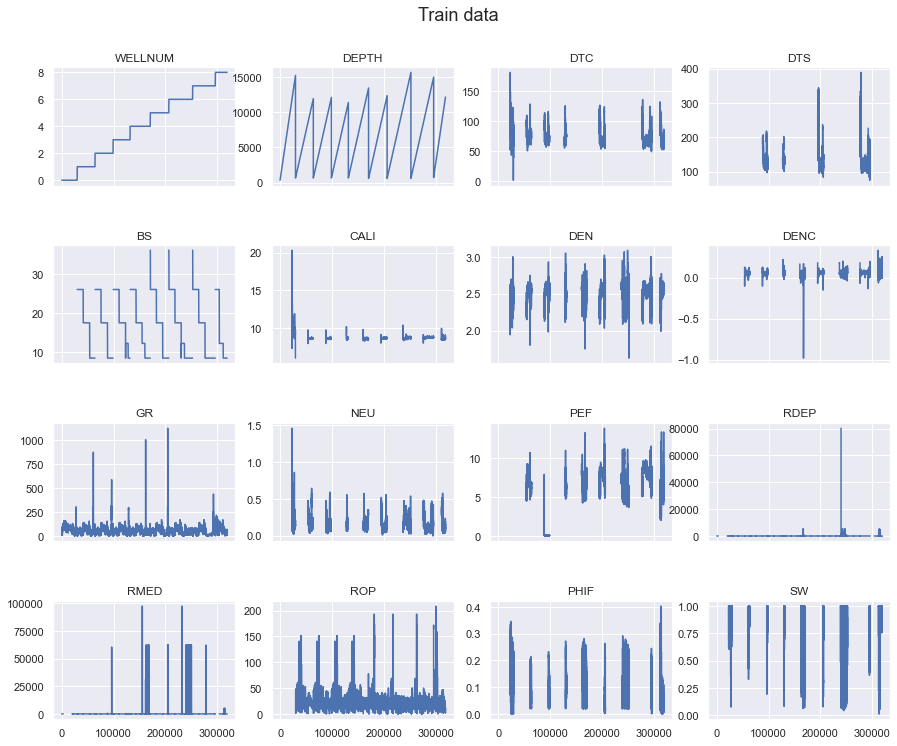

In [138]:
# define subplot grid
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 12), sharex=True) 
plt.subplots_adjust(hspace=0.5) 
fig.suptitle("Train data", fontsize=18, y=0.95)


# loop through tickers and axes
col_names = df.columns
for col_name, ax in zip(col_names, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df[col_name].plot(ax=ax)

    # chart formatting
    ax.set_title(col_name.upper())

plt.show()



Most of data need to pre-processing for Nan and outlier removal.

### <a>4.3 Removing outlier </a>
Outliers are defined as over 3 x standard deviations

In [139]:
def remove_outlier(df, col_name):
    """
    Remove outlier in each features by replacing outliers to NAN
    df : dataframe
    col_name : string / column name
    """
    # define outlieer as larger/smaller by 3 standard deviation of each column data
    upper_limit = df[col_name].mean() + 3*df[col_name].std()
    lower_limit = df[col_name].mean() - 3*df[col_name].std()
    
    # mask as a NaN
    df[col_name] = np.where(df[col_name]>=upper_limit,
                     np.nan,
                     np.where(df[col_name]<=lower_limit,
                              np.nan,
                              df[col_name])
                    )
    

In [140]:

df_trim = df.copy()
remove_outlier(df_trim, col_names)    

Text(0.5, 1.0, 'No outlier')

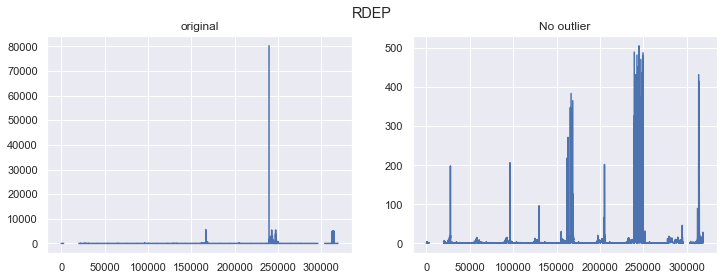

In [141]:
#comparing with / without outlier

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

fig.suptitle('RDEP')

ax1.plot(df['RDEP'])
ax1.set_title('original')

ax2.plot(df_trim['RDEP'])
ax2.set_title('No outlier')




In [150]:
remove_outlier(df, col_names)   

### <a>4.4 Filtering Nan based on Target Columns  </a>

Target features (PHIF, SW, VSH) have only less than 15% valid data. Without valid target value, these samples are less meaningful features. Focusing on valid target data can reduce the number of data and improve efficiency. 

In [151]:
df_no = df[['PHIF','SW','VSH']].dropna()

In [152]:
df_nonan = df.iloc[df_no.index]

In [153]:
# check the NaN in each feature
for col in df.columns:
    print(col, df_nonan[col].isna().sum())

WELLNUM 0
DEPTH 0
DTC 22973
DTS 35018
BS 1836
CALI 1034
DEN 79
DENC 3344
GR 0
NEU 103
PEF 1837
RDEP 4464
RMED 1412
ROP 1933
PHIF 0
SW 0
VSH 0


<AxesSubplot:>

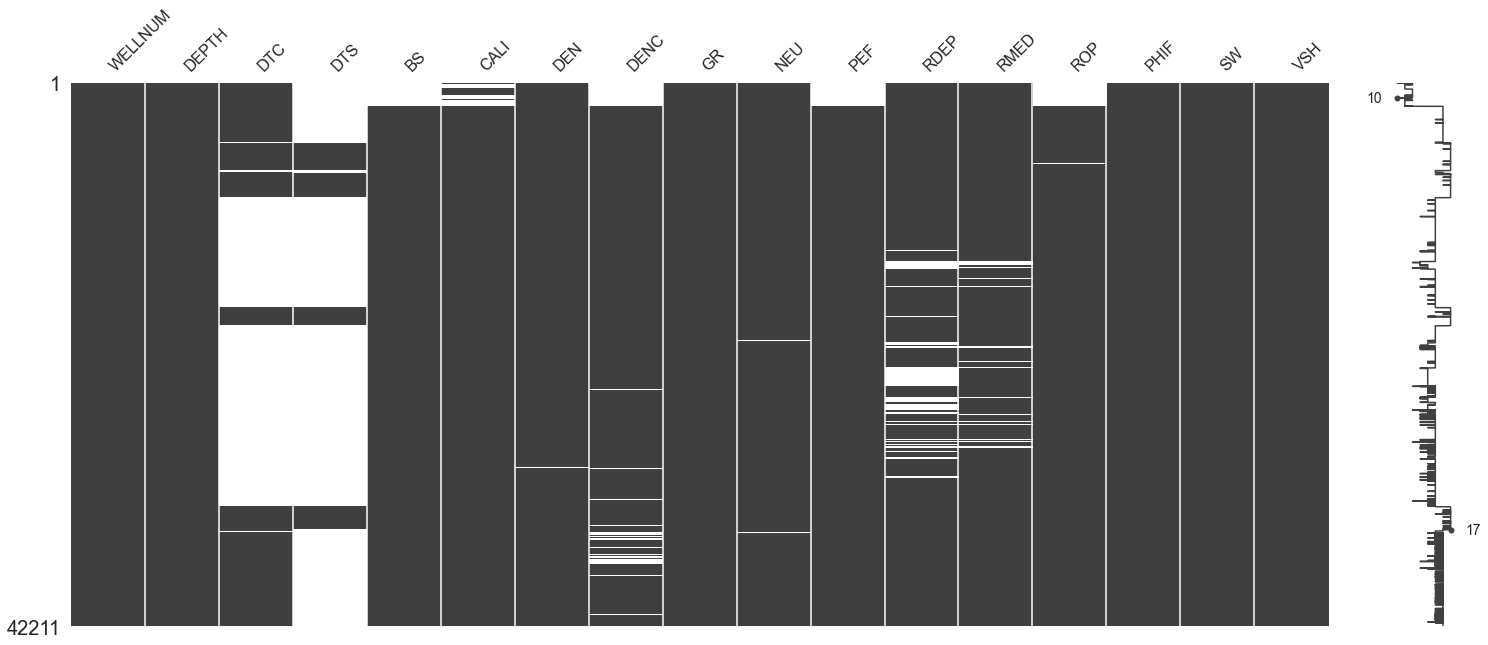

In [154]:
# visualize the reduced valid dataset 
msno.matrix(df_nonan)

In [155]:
missing_data(df_nonan)

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
Total,0,0,22973,35018,1836,1034,79,3344,0,103,1837,4464,1412,1933,0,0,0
Percent (NaN),0.00,0.00,54.42,82.96,4.35,2.45,0.19,7.92,0.00,0.24,4.35,10.58,3.35,4.58,0.00,0.00,0.00
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


Only 13% of data have valid target data in the original dataset. The column "DTC" and "DTS" have still large amount of NaN values. Even these features are dropped, NEU feature can represent these feautres because it has strong correlation with them. (0.87 and 0.83 respectively)

In [156]:
df_nonan.columns

Index(['WELLNUM', 'DEPTH', 'DTC', 'DTS', 'BS', 'CALI', 'DEN', 'DENC', 'GR',
       'NEU', 'PEF', 'RDEP', 'RMED', 'ROP', 'PHIF', 'SW', 'VSH'],
      dtype='object')

### <a>4.5 Identifying the Features and Targets</a>
We will use the first five data columns as the input features for the desired machine-learning task and the last three columns as the targets. We extract the feature vectors and the associated target vectors from the training and testing data set as:

In [157]:
df_nonan=df_nonan.drop(['WELLNUM', 'DTC', 'DTS'], axis=1)
data = df_nonan.dropna()
print(data.columns)
print(data.shape)


Index(['DEPTH', 'BS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF', 'RDEP',
       'RMED', 'ROP', 'PHIF', 'SW', 'VSH'],
      dtype='object')
(33963, 14)


<AxesSubplot:>

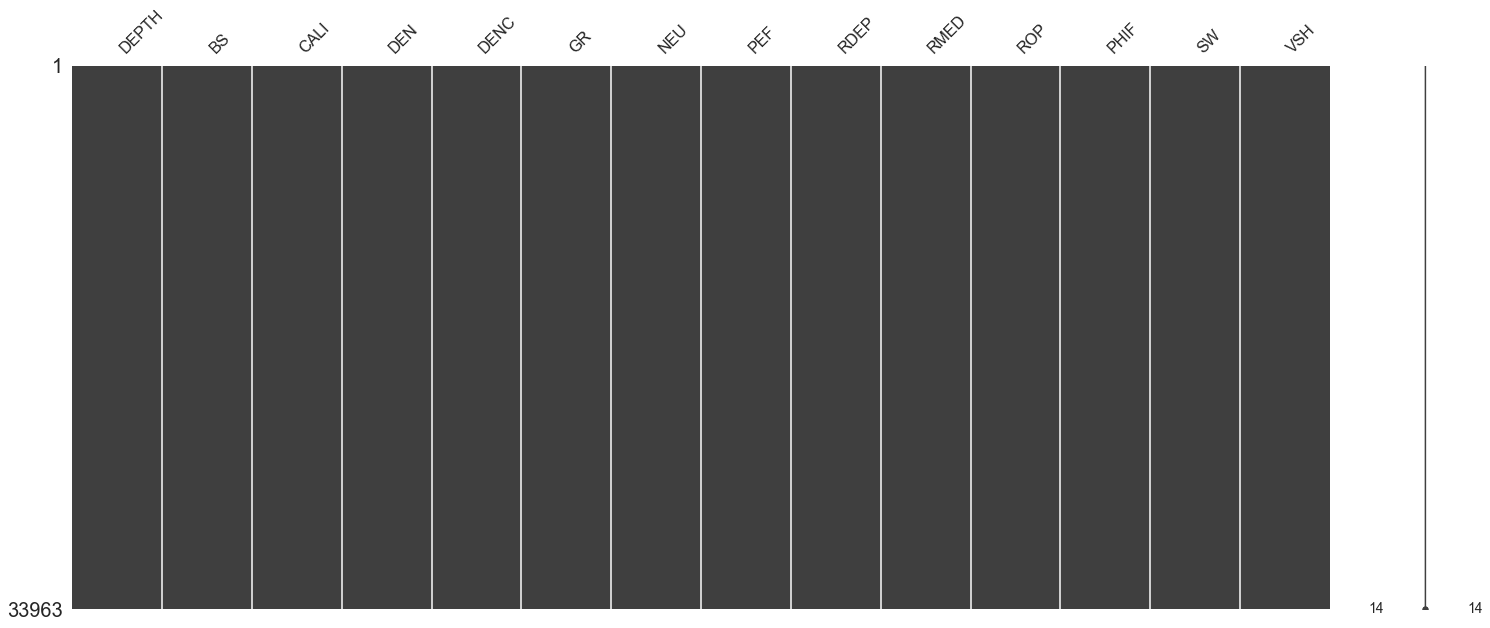

In [158]:
msno.matrix(data)

## <a>5. Build Machine Learning Models</a>

### <a>5.1 Splitting the Dataset into Training and Testing Sets </a>

A standard practice before doing any further data preprocessing and training the supervised learning model is to separate the data into the training and testing data sets, where the testing set can be used to evaluate the generalization of the model in terms of overfitting or underfitting. Once the train-test split is performed, the test data set should not be touched to avoid information leakage from the testing data set to the training data set. The testing data set should be used only for purposes of evaluating the generalization capability of the model. In the code shown below, we used the first seven wells for training and the last well for validation purposes. The participants may apply different strategies to separate the training data set and testing set.

In [159]:
# seperate the features and targets
#df1_data = np.array(df1[col_names])
df_data = np.array(data)
X = df_data[:,:-3]
Y = df_data[:,-3:]
print(X.shape, Y.shape)



# standize the matrix for training data
scaler = StandardScaler()
X = scaler.fit_transform(X)

(33963, 11) (33963, 3)


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

print("X_train: ", X_train.shape , ", y_train: ",y_train.shape)
print("X_test: ", X_test.shape , ", y_test: ",y_test.shape)

X_train:  (27170, 11) , y_train:  (27170, 3)
X_test:  (6793, 11) , y_test:  (6793, 3)


In [161]:
model = lgb.LGBMRegressor(boosting_type='gbdt', 
                          num_leaves=70, 
                          max_depth=-1, 
                          learning_rate=0.05, 
                          min_child_samples=20, 
                          n_estimators=800)

wrapper_lgb = MultiOutputRegressor(model)

In [164]:
    
# param_grid = {'estimator__n_estimator': [200, 400, 800, 1000, 1200],
#               'estimator__num_leaves' : [10, 20, 40, 50, 60, 70, 80, 90, 100],
#               'estimator__max_depth' : [-1],
#               'estimator__min_child_samples' : [20, 40, 60],
#               'estimator__subsample' : [1],
#               'estimator__learning_rate' : [0.05]}

    
param_grid = {'estimator__n_estimator': [800],
              'estimator__num_leaves' : [70],
              'estimator__max_depth' : [-1],
              'estimator__min_child_samples' : [20],
              'estimator__subsample' : [1],
              'estimator__learning_rate' : [0.05]}

cv = RepeatedKFold(n_splits=5,  random_state=123)

grid = GridSearchCV(wrapper_lgb, 
             param_grid=param_grid,
             scoring='neg_root_mean_squared_error',
             cv=cv, # cv, 
             n_jobs=-1)

grid.fit(X_train,y_train)

scores_df = pd.DataFrame(grid.cv_results_)

#scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score',  'split1_test_score',  'split2_test_score', ]]
print(scores_df.transpose())
scores_df.to_csv("light_gbm_co22.csv")

# print best parameter after tuning 
print(grid.best_params_) 


                                   0
mean_fit_time                  12.98
std_fit_time                    1.11
mean_score_time                 3.13
std_score_time                  0.94
param_estimator__learning_rate  0.05
...                              ...
split48_test_score             -0.01
split49_test_score             -0.01
mean_test_score                -0.01
std_test_score                  0.00
rank_test_score                    1

[64 rows x 1 columns]
{'estimator__learning_rate': 0.05, 'estimator__max_depth': -1, 'estimator__min_child_samples': 20, 'estimator__n_estimator': 800, 'estimator__num_leaves': 70, 'estimator__subsample': 1}


### <a>Best parameter selected for LightGBM </a>
- 'estimator__learning_rate': 0.05
- 'estimator__max_depth': -1 
- 'estimator__min_child_samples': 20 
- 'estimator__n_estimator': 800 
- 'estimator__num_leaves': 70 
- 'estimator__subsample': 1


In [ ]:
model = lgb.LGBMRegressor(**grid.best_params_)
wrapper_lgb = MultiOutputRegressor(model)
wrapper_lgb.fit(X_train, y_train)

####  XGBosst : commonly configured hyperparameters

- **n_estimators**: The number of trees in the ensemble, often increased until no further improvements are seen.
- **max_depth**: The maximum depth of each tree, often values are *between 1 and 10*.
- **eta**: The learning rate used to weight each model, often set to small values such as *0.3, 0.1, 0.01*, or smaller.
- **subsample**: The number of samples (rows) used in each tree, set to a value *between 0 and 1, often 1.0* to use all samples.
- **colsample_bytree**: Number of features (columns) used in each tree, set to a value *between 0 and 1, often 1.0* to use all features

In [ ]:
# # XGBoost regressor
# model = xgb.XGBRegressor(n_estimators=500, max_depth=30, learning_rate=0.01)
# wrapper_xgb = MultiOutputRegressor(model)

# cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=123)

# n_scores = cross_val_score(wrapper_xgb, X_train, y_train, 
#                            scoring='neg_root_mean_squared_error',
#                            cv=cv, n_jobs=-1)
# n_scores = absolute(n_scores)

# # summarize performance
# print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# param_grid = {'estimator__learning_rate' : [0.01, 0.05, 0.1],
#               'estimator__n_estimator': [200, 800, 1600],
#               'estimator__max_depth' : [3, 6, 10, 20],
#               'estimator__max_leaf_nodes': [100],
#               'estimator__min_child_weight' : [1],
#               'estimator__colsample_bytree' : [0.3, 0.7],
#               'estimator__subsample' : [1],
#               'estimator__reg_lamda' : [1],
#               'estimator__reg_alpha' : [0.00]}


# cv = RepeatedKFold(n_splits=5,  random_state=123)

# grid = GridSearchCV(wrapper_xgb, 
#              param_grid=param_grid,
#              scoring='neg_root_mean_squared_error',
#              cv=cv, # cv, 
#              n_jobs=-1)

# grid.fit(X_train,y_train)

# scores_df = pd.DataFrame(grid.cv_results_)

# #scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score',  'split1_test_score',  'split2_test_score', ]]
# print()
# scores_df.to_csv("light_xgb_col1.csv")
# print(scores_df.transpose())
# # print best parameter after tuning 
# print(grid.best_params_) 

In [ ]:
# # XGBoost regressor
# model = xgb.XGBRegressor(n_estimators=200, max_depth=10, learning_rate=0.01, min_child_weight=3, colsample_bytree=0.5)
# wrapper_xgb = MultiOutputRegressor(model)

# cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=123)

# n_scores = cross_val_score(wrapper_xgb, X_train, y_train, 
#                            scoring='neg_root_mean_squared_error',
#                            cv=cv, n_jobs=-1)
# n_scores = absolute(n_scores)

# # summarize performance
# print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

## <a>6. Prediction</a>

In [ ]:
# load test data
df2 = pd.read_csv('../data/test.csv')

# Replace missing value -9999 with np.nan
df2.replace(['-9999', -9999], np.nan, inplace=True)

df2.describe()

In [ ]:
df2.columns

In [ ]:
df3 = df2[['DEPTH', 'BS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP']]

In [ ]:
#test_data = np.array(df2.loc[:, col_names[:-3]])
test_data = df3

# Imputation transformer for completing missing values.
# You may try better ways to impute the missing values.
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
test_data = imp_mean.fit_transform(test_data)

# standize testing data
X_test = scaler.transform(test_data)

In [ ]:
# run the prediction

test_predict = wrapper_lgb.predict(X_test)

Generate the csv file, please replace `team_name` and `num_submit` with your own team name and the number of submission. Your submitted csv file should contains 11276 rows: 1st row is column names ['PHIF', 'SW', 'VSH']; 2-11276 rows are your predictions. 

Each team can have 3 submissions. The best score among the 3 submissions will be ranked.

Email your submission to pdda_sig@spwla.org
- Email title: Submission {team_name} {num_submit}
- Attach csv file {team_name}_{n_sub}.csv

In [ ]:
# Replace team_name and num_submit
team_name = 'Jaehyuk_Lee'
num_submit = 1

# Please don't change codes below
N_SAMPLES = 11275
n_sub_dict = {1:1, 2:2, 3:3}

# Check submission number is correct
try:
    n_sub = n_sub_dict[num_submit]
except KeyError:
    print(f"ERROR!!! Sumbmission Number must be in 1, 2 or 3")

# Check number of samples are correct
if test_predict.shape[0] != N_SAMPLES:
    raise ValueError(f"Number of samples {test_predict.shape[0]} doesn't matches with the correct value {N_SAMPLES}")

# Write results to csv file
output_result = pd.DataFrame({col_names[-3]:test_predict[:,0], col_names[-2]:test_predict[:,1], col_names[-1]:test_predict[:,2]})
output_result.to_csv(path_or_buf=f'./{team_name}_{n_sub}.csv', index=False)